In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'/Users/jitendrashirsat/Documents/Time-Series/TimeSeries/Lessons/airline_passengers.csv' \
            ,index_col='Month',parse_dates=True)

In [8]:
df.head(4)

,Passengers,lstdiff
Month,,
1949-01-01,112,<bound method Series.diff of Month\n1949-01-01...
1949-02-01,118,<bound method Series.diff of Month\n1949-01-01...
1949-03-01,132,<bound method Series.diff of Month\n1949-01-01...
1949-04-01,129,<bound method Series.diff of Month\n1949-01-01...


<AxesSubplot:xlabel='Month'>

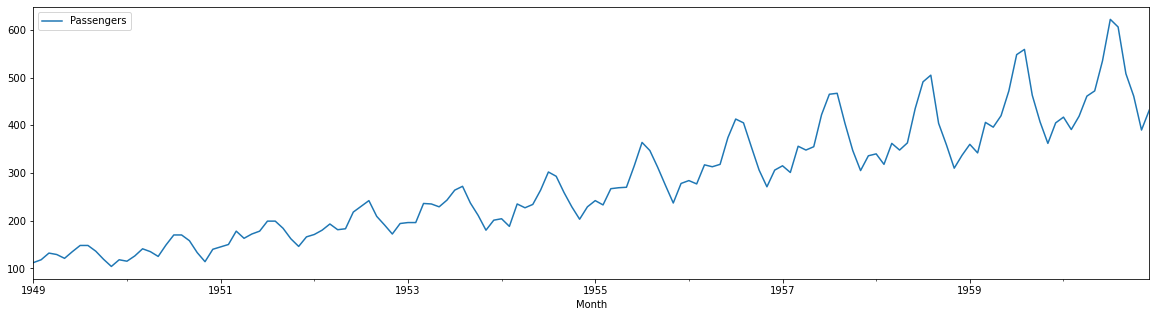

In [5]:
df.plot(figsize=(20,5))

In [9]:
df['lstdiff'] = df['Passengers'].diff()

<AxesSubplot:xlabel='Month'>

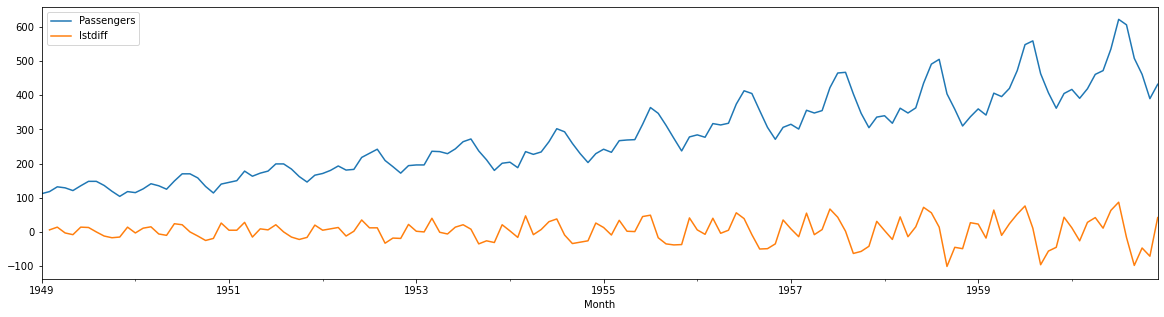

In [10]:
df.plot(figsize=(20,5))

In [11]:
df['LogPassengers'] = np.log(df['Passengers'])

<AxesSubplot:xlabel='Month'>

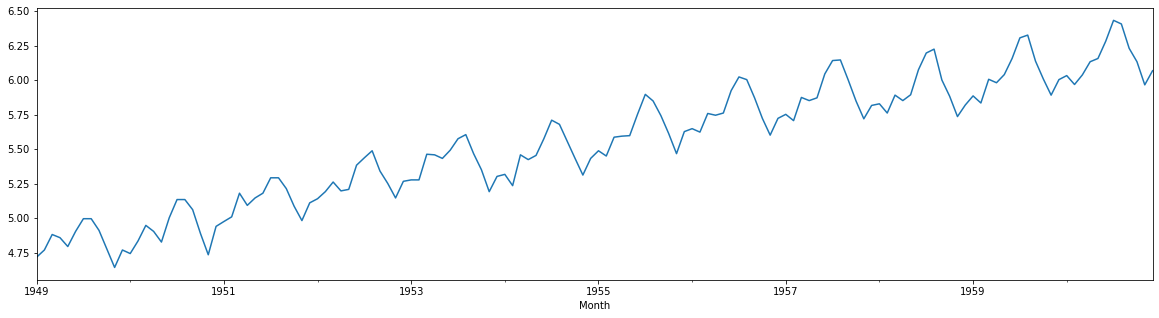

In [12]:
df['LogPassengers'].plot(figsize=(20,5))

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
df.index.freq = 'MS'
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [15]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [19]:
arima_AR_1 = ARIMA(train['Passengers'],order=(1,0,0))

In [20]:
arima_result_AR_1 = arima_AR_1.fit()

In [21]:
df.loc[train_idx,'AR(1)'] = arima_result_AR_1.predict(start=train.index[0], end=train.index[-1])

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

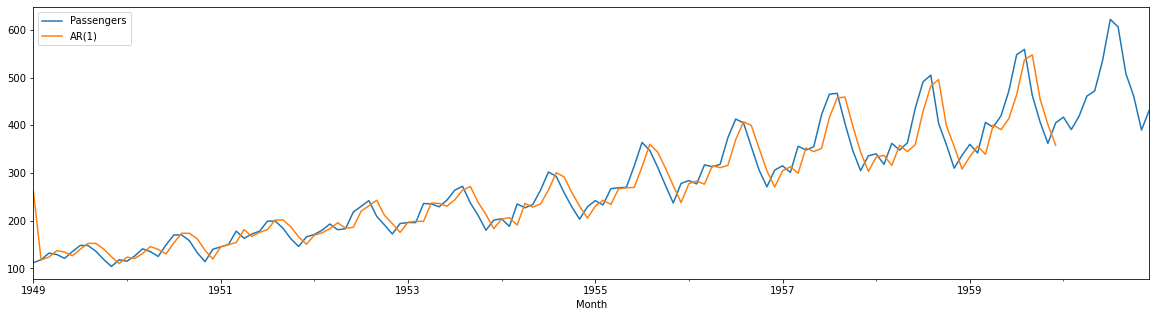

In [23]:
df[['Passengers','AR(1)']].plot(figsize=(20,5))

In [28]:
prediction_result_AR_1 = arima_result_AR_1.get_forecast(Ntest)
forecast_AR_1 = prediction_result_AR_1.predicted_mean
df.loc[test_idx,'AR(1)'] = forecast_AR_1

<AxesSubplot:xlabel='Month'>

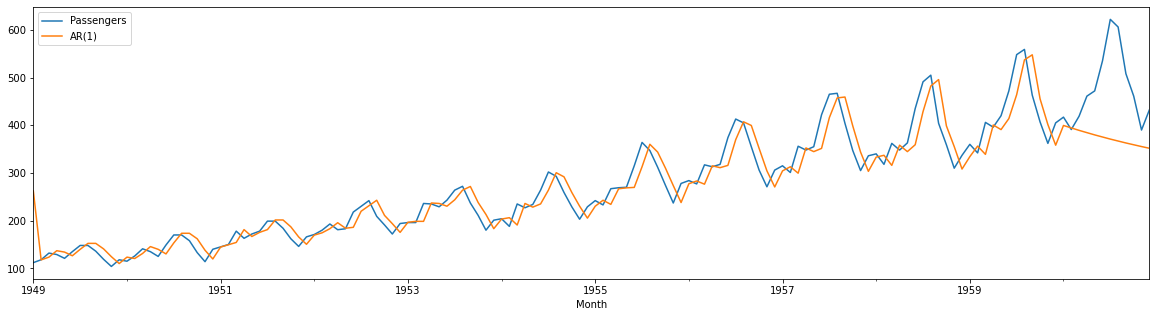

In [29]:
df[['Passengers','AR(1)']].plot(figsize=(20,5))

In [30]:
prediction_result_AR_1.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826172,478.809354
1960-03-01,287.732169,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373403,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [33]:
def plot_fit_and_forecast(result):
    fig,ax = plt.subplots(figsize=(20,5))
    ax.plot(df['Passengers'], label='data')
    
    train_pred = result.fittedvalues
    ax.plot(train.index,train_pred,color='green',label='fitted')
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower , upper = conf_int['lower Passengers'],conf_int['upper Passengers']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index,forecast,label='forecast')
    ax.fill_between(test.index,lower,upper,color='red',alpha=0.3)
    ax.legend()
    

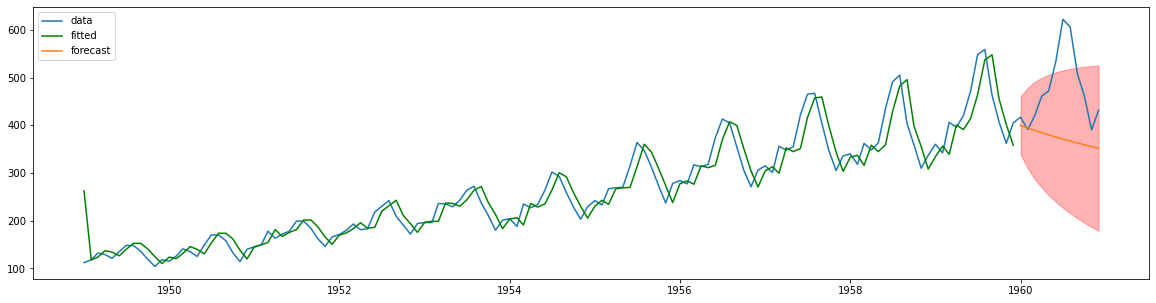

In [34]:
plot_fit_and_forecast(arima_result_AR_1)

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


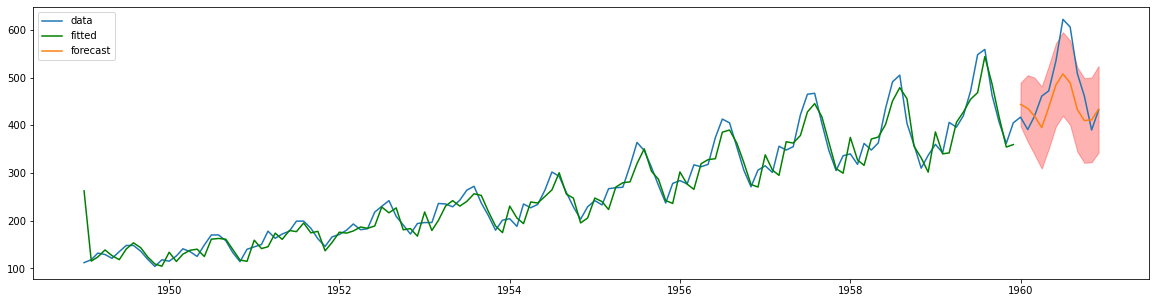

In [35]:
arima_AR_10 = ARIMA(train['Passengers'],order=(10,0,0))
arima_result_AR_10 = arima_AR_10.fit()
plot_fit_and_forecast(arima_result_AR_10)

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


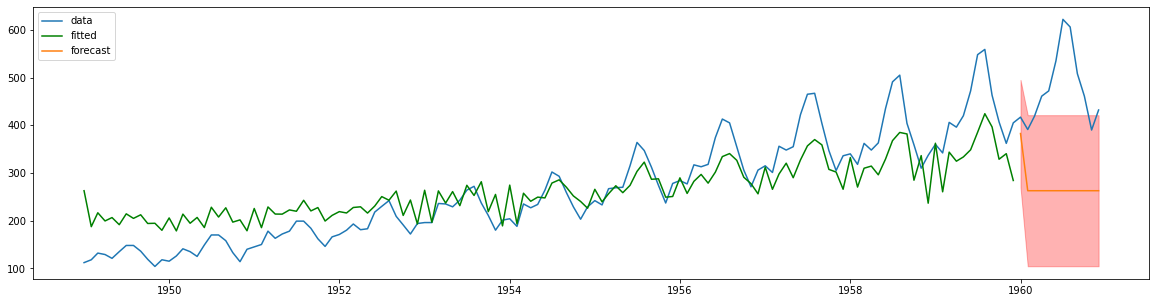

In [36]:
arima_MA_1 = ARIMA(train['Passengers'],order=(0,0,1))
arima_result_MA_1 = arima_MA_1.fit()
plot_fit_and_forecast(arima_result_MA_1)

In [38]:
df['LoglstDiff'] = df['LogPassengers'].diff()

<AxesSubplot:xlabel='Month'>

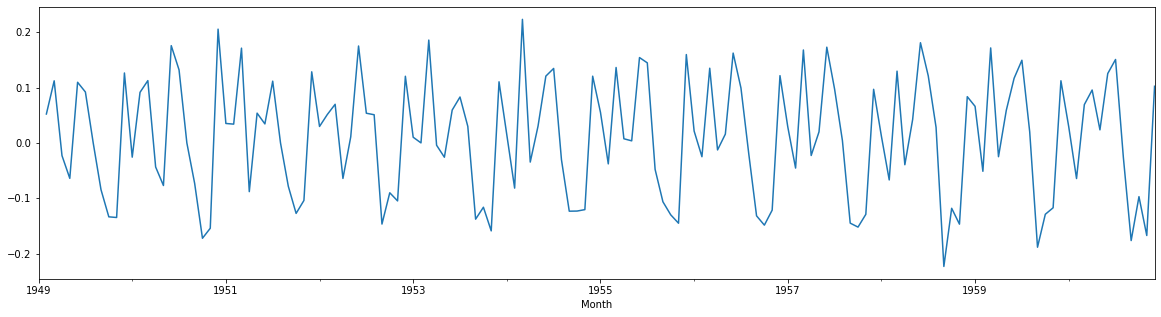

In [39]:
df['LoglstDiff'].plot(figsize=(20,5))

In [41]:
arima811 =  ARIMA(train['Passengers'],order=(8,1,1))
arima_result_811 = arima811.fit()

In [40]:
def plot_fit_and_forecast_int(result,d,col='Passengers'):
    fig, ax = plt.subplots(figsize=(20,5))
    ax.plot(df[col],label='data')
    
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    
    ax.plot(train.index[d:], train_pred, color='green',label='fitted')
    
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower,upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index,forecast,label='forecast')
    ax.fill_between(test.index,lower,upper,color='red',alpha=0.3)
    ax.legend()
    
    

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


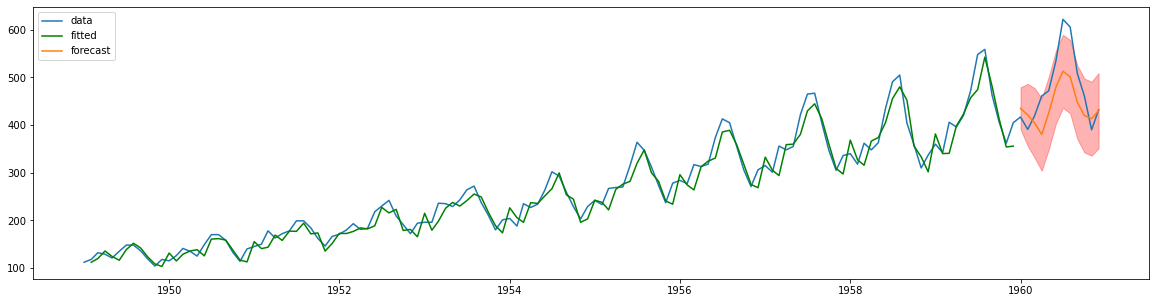

In [43]:
plot_fit_and_forecast_int(arima_result_811,1)

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


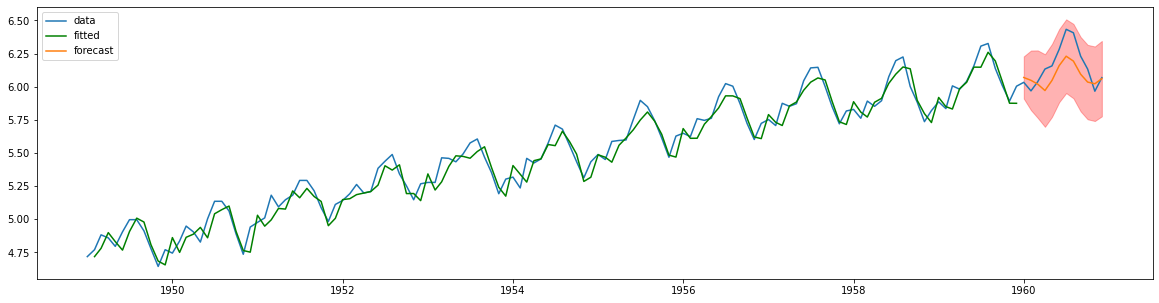

In [45]:
arimalog811 =  ARIMA(train['LogPassengers'],order=(8,1,1))
arima_result_log811 = arimalog811.fit()
plot_fit_and_forecast_int(arima_result_log811,1,col='LogPassengers')

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


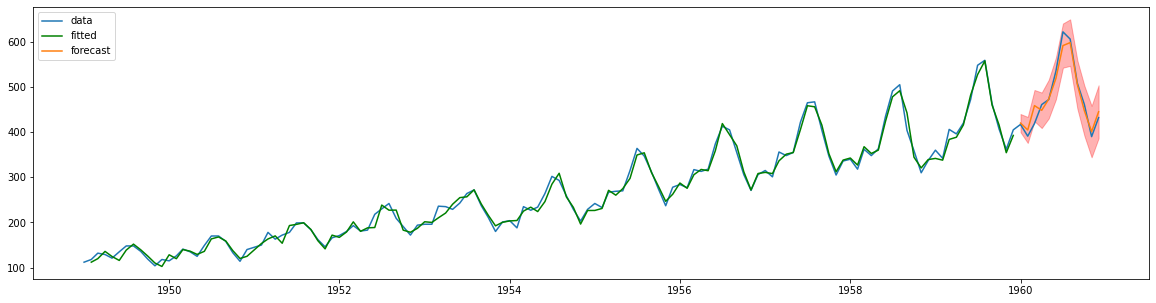

In [46]:
arima1210 =  ARIMA(train['Passengers'],order=(12,1,0))
arima_result_1210 = arima1210.fit()
plot_fit_and_forecast_int(arima_result_1210,1,col='Passengers')

/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jitendrashirsat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


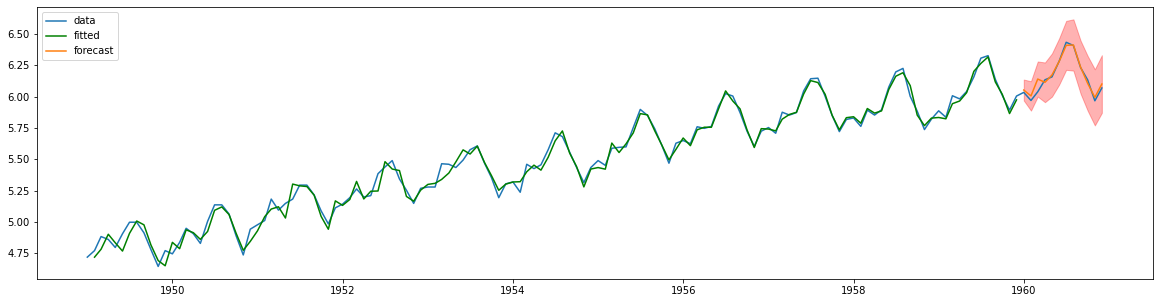

In [48]:
arimalog1210 =  ARIMA(train['LogPassengers'],order=(12,1,0))
arima_result_log1210 = arimalog1210.fit()
plot_fit_and_forecast_int(arima_result_log1210,1,col='LogPassengers')

In [49]:
def rmse(result,is_logged):
    forecast = result.forecast(Ntest)
    if is_logged:
        forecast = np.exp(forecast)
        
    t = test['Passengers']
    y = forecast
    return np.sqrt(np.mean((t-y)**2))
    
    

In [50]:
print("ARIMA(8,1,1):" , rmse(arima_result_811,False))
print("ARIMA(8,1,1) logged:" , rmse(arima_result_log811,True))
print("ARIMA(12,1,0):" , rmse(arima_result_1210,False))
print("ARIMA(8,1,1) logged:" , rmse(arima_result_log1210,True))

ARIMA(8,1,1): 59.06458659352886
ARIMA(8,1,1) logged: 61.60410178699154
ARIMA(12,1,0): 17.483957583532877
ARIMA(8,1,1) logged: 16.115589657304067
